In [8]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# prompt: set environment variable OPENAI_API_KEY

import os
os.environ['OPENAI_API_KEY'] = ""


In [10]:
#  "models:
#  - type: main
#    engine: openai
#    model: gpt-3.5-turbo-instruct"

import os

# Create the config directory if it doesn't exist
if not os.path.exists('config'):
    os.makedirs('config')

# Define the path to the config.yml file
config_file_path = os.path.join('config', 'config.yml')

# Create and write the config.yml file
with open(config_file_path, 'w') as f:
  f.write('''models:
 - type: main
   engine: openai
   model: gpt-3.5-turbo-instruct

instructions:
  - type: general
    content: |
      Below is a conversation between a user and a bot called the Helper Bot.
      The bot is designed to answer any questions posed by the user.
      If the bot does not know the answer to a question, it truthfully says it does not know.

rails:
  input:
    flows:
      - self check input''')


In [11]:

# Define the path to the config.yml file
config_file_path = os.path.join('config', 'prompts.yml')

# Create and write the config.yml file
with open(config_file_path, 'w') as f:
  f.write('''prompts:
  - task: self_check_input
    content: |
      Your task is to check if the user message below complies with the rules for talking with the Helper Bot.

      Rules for the user messages:
      -should not respond to questions about fruits or vegetables
      -should not respond to vulgar language
      -should answer questions regarding corporations

      User message: "{{ user_input }}"

      Question: Should the user message be blocked (Yes or No)?
      Answer:''')
"""
with open(config_file_path, 'w') as f:
  f.write('''rails:
  ''')
"""

"\nwith open(config_file_path, 'w') as f:\n  f.write('''rails:\n  ''')\n"

In [12]:
config_file_path = os.path.join('config', 'rails.co')

# Create and write the config.yml file
with open(config_file_path, 'w') as f:
  f.write('''define user express greeting
  "Hello"
  "Hi"
  "Wassup?"

define flow greeting
  user express greeting
  bot express greeting
  bot ask how are you

define bot express greeting
  "Hello World!"

define bot ask how are you
  "What would you like to discuss?"''')

In [ ]:
import pandas as pd
import time
import openai
import tiktoken
from nemoguardrails import RailsConfig, LLMRails
import math
import pandas as pd

config = RailsConfig.from_path("./config")

rails = LLMRails(config)

try:
  df = pd.read_parquet("hf://datasets/data-is-better-together/10k_prompts_ranked/data/train-00000-of-00001.parquet")
  #df = pd.read_csv('your_dataset.csv')
  #test_messages = df[0].tolist()  # Assuming the column name is 'user_input'
  test_messages = df.iloc[:, 0].tolist()
except FileNotFoundError:
    print("Dataset file not found. Please make sure 'your_dataset.csv' exists in the current directory.")
    test_messages = []  # Fallback: Use an empty list to avoid errors

model_name = "gpt-3.5-turbo"
# ... (Your existing code for NeMo and OpenAI setup)

# Initialize lists to store results
nemo_times = []
nemo_tokens = []
oa_times = []
oa_tokens = []

# Limit to 100 calls or the number of messages in the dataset
num_calls = min(100, len(test_messages))
print(test_messages)

reject_prompts = 0

for i in range(num_calls):
    msg = {"role": "user", "content": test_messages[i]}
    print(msg)

    # NeMo Guardrails call
    start_nemo = time.time()
    nemo_response = rails.generate(messages=[msg])
    end_nemo = time.time()
    nemo_time = end_nemo - start_nemo
    nemo_times.append(nemo_time)
    info = rails.explain()
    temp_count = 0
    for call in info.llm_calls:
      temp_count += call.total_tokens
    #print(f"Nemo Guardrails token usage: {temp_count} tokens")
    nemo_tokens.append(temp_count)
    temp_count = 0
    for call in info.llm_calls:
      temp_count += 1
    if temp_count == 1:
      reject_prompts += 1

    # OpenAI call
    start_oa = time.time()
    openai_response = openai.responses.create(model=model_name, input=[msg])
    end_oa = time.time()
    oa_time = end_oa - start_oa
    oa_times.append(oa_time)
    usage = openai_response.usage
    oa_tokens.append(usage.total_tokens)

# Calculate averages
avg_nemo_time = sum(nemo_times) / len(nemo_times)
avg_nemo_tokens = sum(nemo_tokens) / len(nemo_tokens)
avg_oa_time = sum(t for t in oa_times if t is not None) / len([t for t in oa_times if t is not None]) if any(oa_times) else None
avg_oa_tokens = sum(t for t in oa_tokens if t is not None) / len([t for t in oa_tokens if t is not None]) if any(oa_tokens) else None


print(f"\nAverage NeMo Guardrails response time: {avg_nemo_time:.2f}s")
print(f"Average NeMo Guardrails token usage: {avg_nemo_tokens:.2f} tokens")
print(f"Average OpenAI response time: {avg_oa_time:.2f}s" if avg_oa_time is not None else "No successful OpenAI calls.")
print(f"Average OpenAI token usage: {avg_oa_tokens:.2f} tokens" if avg_oa_tokens is not None else "No successful OpenAI calls.")
print("Rejected prompts: ")
print(reject_prompts)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'role': 'user', 'content': 'Write a personal essay of at least 1000 words discussing how embracing vulnerability and authenticity has affected your life. Use specific examples from your own experiences to support your arguments and make sure to address the following questions:'}
{'role': 'user', 'content': 'In this research, we aim to investigate how technology can moderate the correlation between knowledge management practices and the overall performance of an organization. This analysis will focus on specific technological tools and their impact on knowledge management in relation to various aspects of organizational performance. Additionally, we will explore how this relationship may vary across different industries and organizational structures.'}
{'role': 'user', 'content': "Did Karl Marx's theories on centralizing credit have anything to do with our current central banking system?"}
{'role': 'user', 'content': 'alter this api that gets a request like: {"0","5","2","3","5","5","1

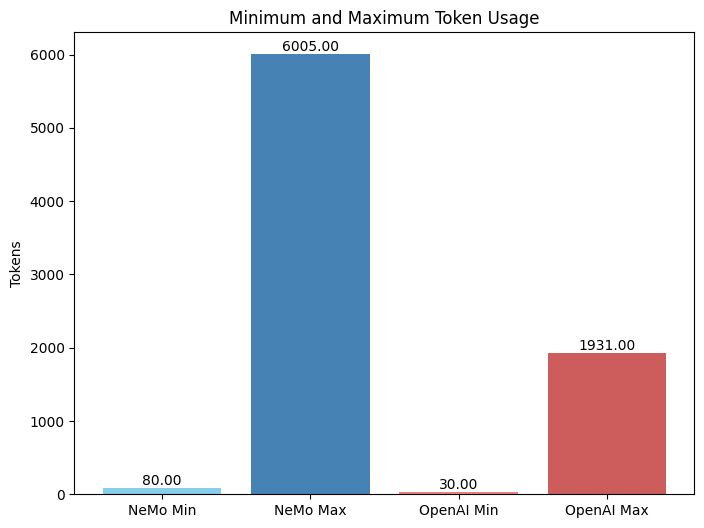

In [16]:

import matplotlib.pyplot as plt

min_nemo_time = min(nemo_tokens)
max_nemo_time = max(nemo_tokens)
min_oa_time = min(oa_tokens)
max_oa_time = max(oa_tokens)


labels = ['NeMo Min', 'NeMo Max', 'OpenAI Min', 'OpenAI Max']
values = [min_nemo_time, max_nemo_time, min_oa_time, max_oa_time]

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(labels, values, color=['skyblue', 'steelblue', 'lightcoral', 'indianred'])
plt.ylabel('Tokens')
plt.title('Minimum and Maximum Token Usage')

# Add value labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()


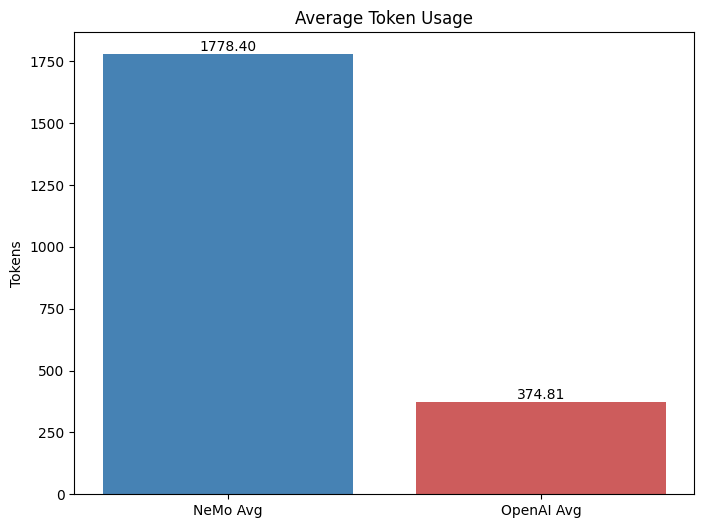

In [19]:

import matplotlib.pyplot as plt


labels = ['NeMo Avg', 'OpenAI Avg']
values = [avg_nemo_tokens, avg_oa_tokens]

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(labels, values, color=['steelblue','indianred'])
plt.ylabel('Tokens')
plt.title('Average Token Usage')

# Add value labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()


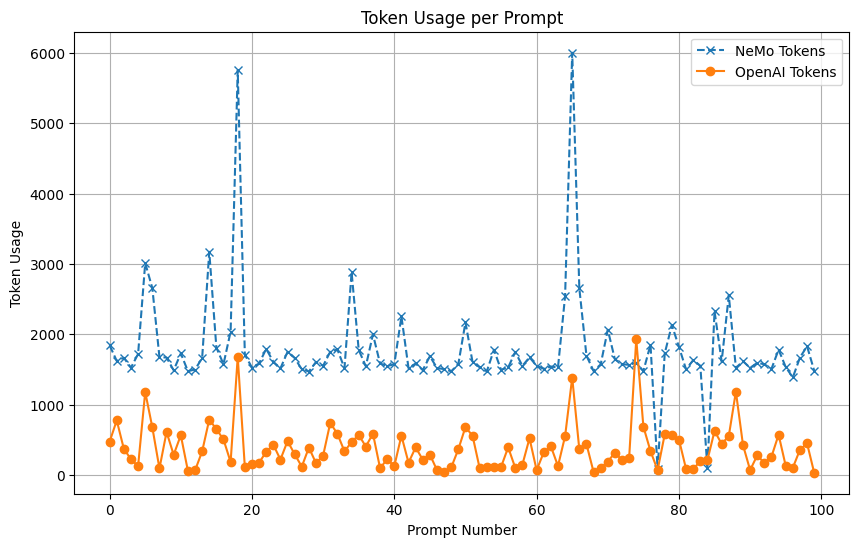

In [20]:
# prompt: Can you give me code that graphs the token usage per prompt from oa_tokens and nemo_tokens

import matplotlib.pyplot as plt

# Assuming oa_tokens and nemo_tokens are already populated from your previous code

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(nemo_tokens)), nemo_tokens, label='NeMo Tokens', marker='x', linestyle='--')
plt.plot(range(len(oa_tokens)), oa_tokens, label='OpenAI Tokens', marker='o', linestyle='-')


# Customize the plot
plt.xlabel('Prompt Number')
plt.ylabel('Token Usage')
plt.title('Token Usage per Prompt')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


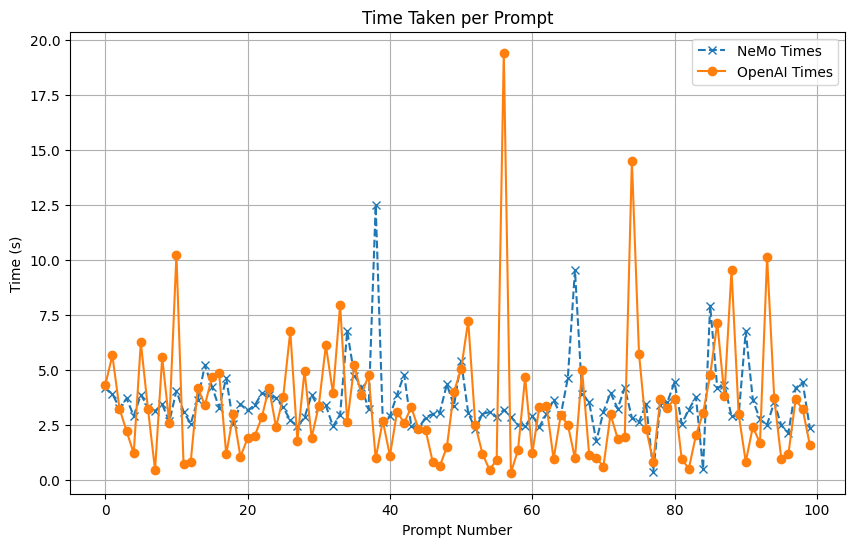

In [24]:
# prompt: Can you give me code that graphs the token usage per prompt from oa_tokens and nemo_tokens

import matplotlib.pyplot as plt

# Assuming oa_tokens and nemo_tokens are already populated from your previous code

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(nemo_times)), nemo_times, label='NeMo Times', marker='x', linestyle='--')
plt.plot(range(len(oa_times)), oa_times, label='OpenAI Times', marker='o', linestyle='-')


# Customize the plot
plt.xlabel('Prompt Number')
plt.ylabel('Time (s)')
plt.title('Time Taken per Prompt')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
